<h2 style="color:white;background-color:#3cb371">Credit card default prediction</h2>

In [1]:
#importing python module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
df = pd.read_csv("credit card default.csv")

In [4]:
#display first 3 rows 
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [5]:
#display last 3 rows
df.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
df.shape

(30000, 25)

In [7]:
#Checking the statistical discription of our dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
#to print information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
#for convenience changing the name of column from "default payment next month" to "default"
df = df.rename(columns = {'default payment next month': 'default'})

In [10]:
#to print the name of all the columns present
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

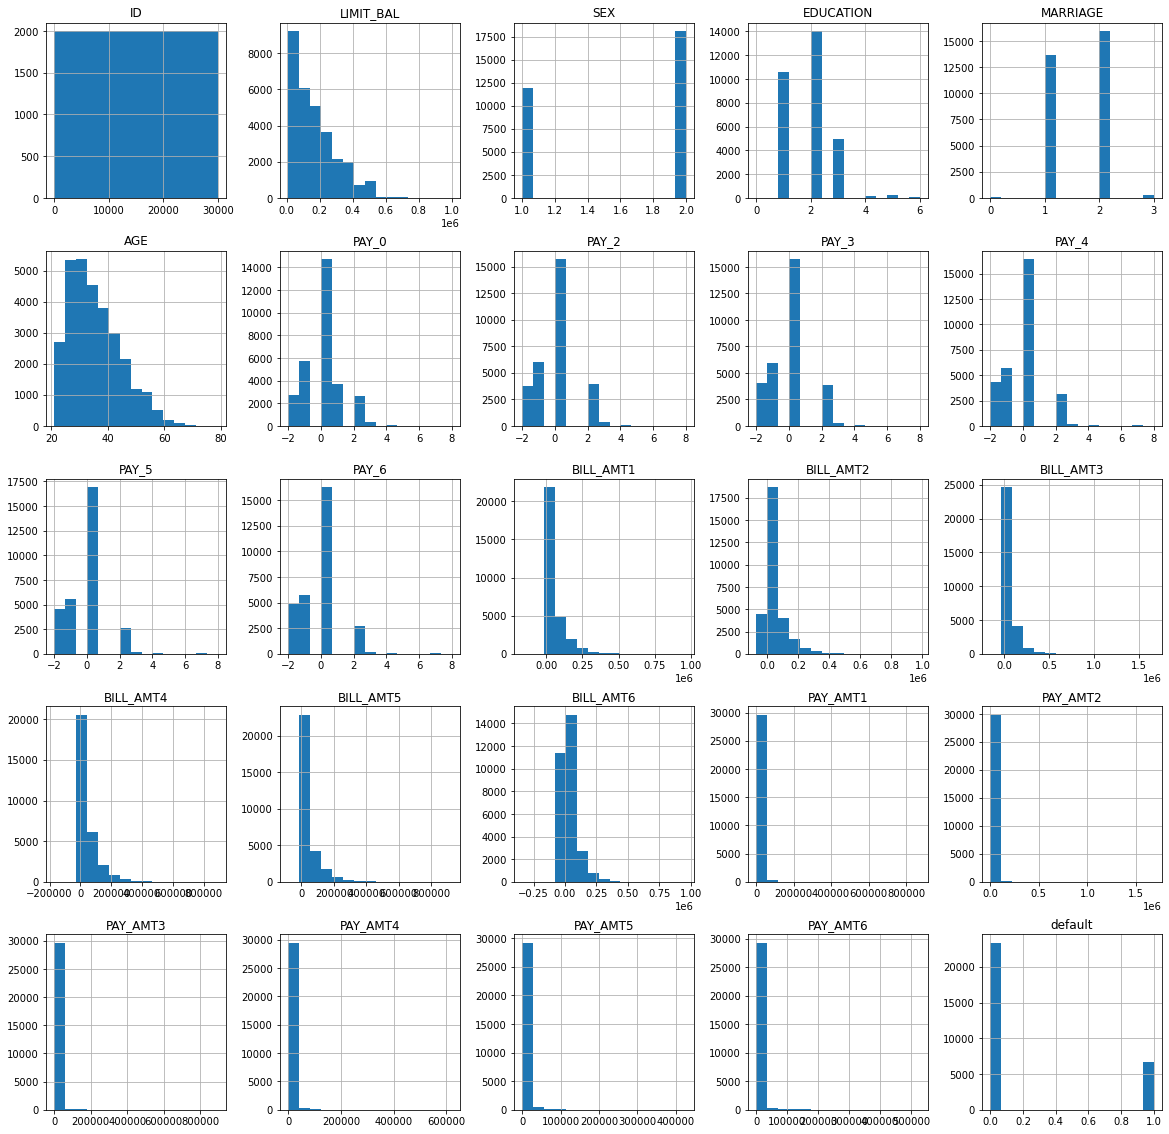

In [11]:
#to get an intuitive sense of the distribution of values within variable.
df.hist(bins=15, figsize=(20,20))
plt.show()

<h4>Q. How many defaulters are present?<h4>  

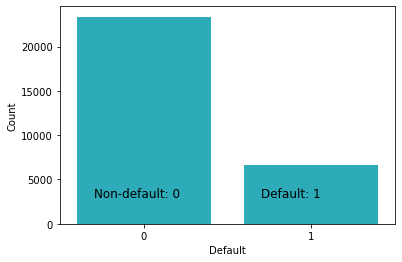

In [13]:
plt.figure()
sns.countplot(x="default", data=df, color ='tab:cyan')
plt.annotate('Non-default: {}'.format(0), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(1), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

For this classification model our target class is  

In [42]:
df["default"].value_counts()

0    23364
1     6636
Name: default, dtype: int64

Out of 30000 credit card users 6,636 are defaulters and the rest 23,364 are non-defaulters

<AxesSubplot:xlabel='SEX', ylabel='count'>

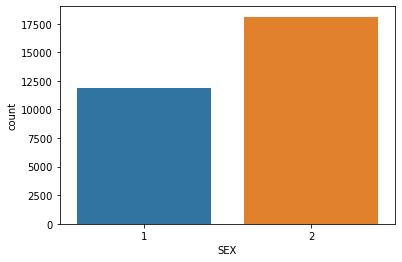

In [38]:
sns.countplot(data=df, x= "SEX")

<AxesSubplot:xlabel='SEX', ylabel='count'>

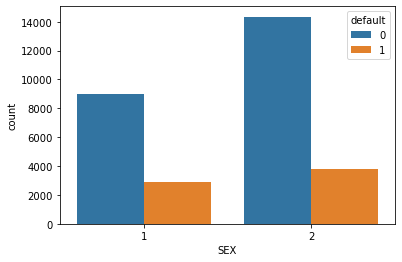

In [43]:
sns.countplot(x="SEX", hue = "default", data=df)

corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
#making of heatmap
df_heatmap = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [14]:
  df = df.drop('ID', axis=1)

In [15]:
Y = df['default']
X = df.drop('default', axis=1)
    

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()    

In [18]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [19]:
 X_smote, Y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'default')], df['default'])

In [20]:
X = X_smote

In [21]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,50000,1,2,1,33,0,0,0,0,0,...,30299,31247,31890,32541,1595,1618,1566,1150,1173,1511
46724,20000,1,3,1,24,0,1,1,-1,-1,...,313,408,-80,-80,618,313,408,0,0,0
46725,180000,1,1,1,35,-1,-1,0,0,-1,...,1191,382,647,1015,1022,838,103,647,1015,279
46726,50000,2,2,1,35,0,0,0,0,0,...,47340,48281,50195,50247,2069,1803,1750,2703,1055,2000


In [16]:
def onehot_encode(X, column_dict):
    X = X.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(X[column], prefix=prefix)
        X = pd.concat([X, dummies], axis=1)
        X = X.drop(column, axis=1)
    return X

In [22]:
X = onehot_encode(X,{'EDUCATION': 'EDU','MARRIAGE': 'MAR','SEX': 'sex'})

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [24]:
Y = Y_smote

In [25]:
X

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3,sex_1,sex_2
0,-1.065167,-1.295058,1.635605,1.617798,-0.810761,-0.760693,-1.576279,-1.535833,-0.631906,-0.639095,...,-0.371241,-0.058982,-0.079025,-0.033055,-0.039284,0.906037,-0.890480,-0.084077,-0.987833,0.987833
1,-0.271300,-1.068720,-1.041496,1.617798,0.009532,0.058049,0.102193,1.800083,-0.648637,-0.658376,...,-0.371241,-0.058982,-0.079025,-0.033055,-0.039284,-1.103708,1.122989,-0.084077,-0.987833,0.987833
2,-0.509460,-0.163367,-0.149129,-0.027821,0.009532,0.058049,0.102193,0.132125,-0.287687,-0.486128,...,-0.371241,-0.058982,-0.079025,-0.033055,-0.039284,-1.103708,1.122989,-0.084077,-0.987833,0.987833
3,-0.827007,0.176140,-0.149129,-0.027821,0.009532,0.058049,0.102193,0.132125,-0.046424,-0.007189,...,-0.371241,-0.058982,-0.079025,-0.033055,-0.039284,0.906037,-0.890480,-0.084077,-0.987833,0.987833
4,-0.827007,2.439522,-1.041496,-0.027821,-0.810761,0.058049,0.102193,0.132125,-0.567971,-0.603139,...,-0.371241,-0.058982,-0.079025,-0.033055,-0.039284,0.906037,-0.890480,-0.084077,1.012317,-1.012317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,-0.827007,-0.276536,-0.149129,-0.027821,0.009532,0.058049,0.102193,0.132125,-0.302597,-0.272603,...,-0.371241,-0.058982,-0.079025,-0.033055,-0.039284,0.906037,-0.890480,-0.084077,1.012317,-1.012317
46724,-1.065167,-1.295058,-0.149129,0.794988,0.829825,-0.760693,-0.737043,-1.535833,-0.479966,-0.489978,...,2.693665,-0.058982,-0.079025,-0.033055,-0.039284,0.906037,-0.890480,-0.084077,1.012317,-1.012317
46725,0.205020,-0.050198,-1.041496,-0.850631,0.009532,0.058049,-0.737043,-0.701854,-0.668807,-0.668219,...,-0.371241,-0.058982,-0.079025,-0.033055,-0.039284,0.906037,-0.890480,-0.084077,1.012317,-1.012317
46726,-0.827007,-0.050198,-0.149129,-0.027821,0.009532,0.058049,0.102193,1.800083,-0.069448,-0.029885,...,-0.371241,-0.058982,-0.079025,-0.033055,-0.039284,0.906037,-0.890480,-0.084077,-0.987833,0.987833


In [26]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: default, Length: 46728, dtype: int64

In [27]:
from sklearn import preprocessing
from sklearn import utils


In [28]:
lab = preprocessing.LabelEncoder()
Y = lab.fit_transform(Y)
print(Y)

[1 1 0 ... 1 1 1]


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=7)

In [30]:
X_train.shape

(37382, 33)

In [31]:
X_test.shape

(9346, 33)

In [32]:
Y_train.shape

(37382,)

In [33]:
Y_test.shape

(9346,)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [35]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_predlr = lr.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

logistic regression classification report 
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      4619
           1       0.72      0.71      0.72      4727

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346



Text(377.15999999999997, 0.5, 'True_default')

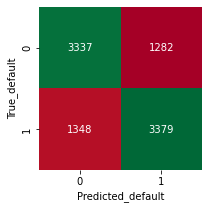

In [37]:
print("logistic regression classification report \n", classification_report(Y_test, Y_predlr))
matrix_confusion = confusion_matrix(Y_test, Y_predlr)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_predknn = knn.predict(X_test)

k nearest neighbor classification report 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      4619
           1       0.75      0.75      0.75      4727

    accuracy                           0.75      9346
   macro avg       0.75      0.74      0.74      9346
weighted avg       0.75      0.75      0.75      9346



Text(377.15999999999997, 0.5, 'True_default')

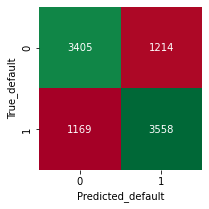

In [39]:
print("k nearest neighbor classification report \n", classification_report(Y_test, Y_predknn))
matrix_confusion = confusion_matrix(Y_test, Y_predknn)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [40]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_prednb = nb.predict(X_test)

Naive Bayes classification report 
               precision    recall  f1-score   support

           0       0.80      0.10      0.18      4619
           1       0.53      0.98      0.68      4727

    accuracy                           0.54      9346
   macro avg       0.66      0.54      0.43      9346
weighted avg       0.66      0.54      0.44      9346



Text(377.15999999999997, 0.5, 'True_default')

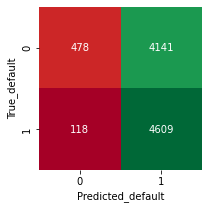

In [41]:
print("Naive Bayes classification report \n", classification_report(Y_test, Y_prednb))
matrix_confusion = confusion_matrix(Y_test, Y_prednb)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [42]:
svm = SVC()
svm.fit(X_train,Y_train)
Y_predsvm = svm.predict(X_test)

Support Vector Machine classification report 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      4619
           1       0.77      0.71      0.74      4727

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



Text(377.15999999999997, 0.5, 'True_default')

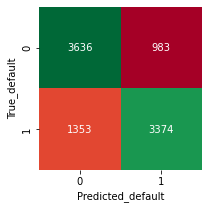

In [43]:
print("Support Vector Machine classification report \n", classification_report(Y_test, Y_predsvm))
matrix_confusion = confusion_matrix(Y_test, Y_predsvm)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [44]:
rfm = RandomForestClassifier()
rfm.fit(X_train,Y_train)
Y_predrfm = rfm.predict(X_test)

Random Forest classification report 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      4619
           1       0.85      0.82      0.84      4727

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



Text(377.15999999999997, 0.5, 'True_default')

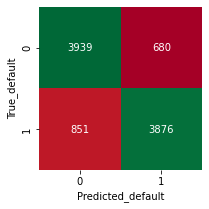

In [45]:
print("Random Forest classification report \n", classification_report(Y_test, Y_predrfm))
matrix_confusion = confusion_matrix(Y_test, Y_predrfm)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [46]:
Y_test = pd.DataFrame(Y_test)

In [47]:
Y_test.value_counts()

1    4727
0    4619
dtype: int64

In [48]:
classification_data = {
                       "classication algorithm": [ "LogisticRegression", "KNeighborsClassifier", "GaussianNB", "SVC", "RandomForestClassifier"],
                       "accuracy": [0.72, 0.75, 0.54, 0.75, 0.84],
                       " weighted avg precision": [0.79, 0.77, 0.76, 0.80, 0.79],
                       "weighted avg reacall": [0.81, 0.79, 0.27, 0.82, 0.81],
                       " f-1 score": [0.78, 0.77, 0.19, 0.79, 0.79],
                      }

In [49]:
classification_data = pd.DataFrame(classification_data)
classification_data

,classication algorithm,accuracy,weighted avg precision,weighted avg reacall,f-1 score
0,LogisticRegression,0.81,0.79,0.81,0.78
1,KNeighborsClassifier,0.79,0.77,0.79,0.77
2,GaussianNB,0.27,0.76,0.27,0.19
3,SVC,0.82,0.80,0.82,0.79
4,RandomForestClassifier,0.81,0.79,0.81,0.79


In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
rfc = RandomForestClassifier(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [1]:
grid_search.best_estimator_.fit(X_train, Y_train)

NameError: name 'grid_search' is not defined